<a href="https://colab.research.google.com/github/RainaVardhan/project_voting/blob/main/model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/DS3001/project_voting.git

Cloning into 'project_voting'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 93 (delta 6), reused 3 (delta 3), pack-reused 80
Receiving objects: 100% (93/93), 61.29 MiB | 7.05 MiB/s, done.
Resolving deltas: 100% (31/31), done.
Updating files: 100% (43/43), done.


In [45]:
#cleaned data for county data - get demographics

import pandas as pd
import numpy as np

df = pd.read_csv('/content/project_voting/data/county_data/0002_ds250_20205_county_E.csv') #asked chat how to fix encoding error
df['U.S. citizen: Born in the US'] = df['AM0KE002']
df['U.S. citizen: Born abroad'] = df['AM0KE004']
df['U.S. citizen: Naturalized'] = df['AM0KE005']
df['Male'] = df['AM8FE002']
df['Female'] = df['AM8FE021']
df['18 to 30 years'] = df['AM8FE009']+df['AM8FE028']
df['35 to 64 years'] = df['AM8FE012']+df['AM8FE031']
df['65 to 74 years'] = df['AM8FE015']+df['AM8FE034']
df['75 years and over'] = df['AM8FE018']+df['AM8FE037']

virginia_county_data = df[df['STATE'] == 'Virginia']

vars_to_keep = ['COUNTY','U.S. citizen: Born in the US', 'U.S. citizen: Born abroad', 'U.S. citizen: Naturalized', 'Male', 'Female', '18 to 30 years', '35 to 64 years', '65 to 74 years', '75 years and over']
county_data = virginia_county_data[vars_to_keep]
# county_data = county_data.drop(virginia_county_data.index[0])
county_data.head()

county_data.isna().sum()
county_data = county_data.dropna()
county_data.isna().sum()
print(county_data.head())



                COUNTY U.S. citizen: Born in the US U.S. citizen: Born abroad  \
2822   Accomack County                        29524                       192   
2823  Albemarle County                        95653                      1470   
2824  Alleghany County                        14733                       111   
2825     Amelia County                        12694                        97   
2826    Amherst County                        30977                       151   

     U.S. citizen: Naturalized   Male Female 18 to 30 years 35 to 64 years  \
2822                       782  15612  16517       26242858       58826474   
2823                      5183  51009  56466     1268513740     1868020763   
2824                        91   7229   7525       13411266       28193052   
2825                        73   6524   6356       11761165       26702667   
2826                       361  15170  16423       30713106       60916596   

     65 to 74 years 75 years and over  
2822

In [46]:
#cleaned data to get party and total candidate votes 2020

df = pd.read_csv('/content/project_voting/data/voting_VA.csv')
#df.head()

# check for nan values
print(df.isnull().values.any())

# check for possible mistakes
df[df['totalvotes'] == 0]

# split the dataframe into each year
votes_2012 = df[df['year']==2012]
votes_2016 = df[df['year']==2016]
votes_2020 = df[df['year']==2020]

# find out which party got the most votes in each county
winners_2012_idx = votes_2012.groupby('county_name')['candidatevotes'].idxmax() # find maximum number of candidatevotes for county using idxmax
winners_2012 = votes_2012.loc[winners_2012_idx]
winners_2016_idx = votes_2016.groupby('county_name')['candidatevotes'].idxmax()
winners_2016 = votes_2016.loc[winners_2016_idx]
winners_2020_idx = votes_2020.groupby('county_name')['candidatevotes'].idxmax()
winners_2020 = votes_2020.loc[winners_2020_idx]

# combine the dataframes into 1
winners_all = pd.concat([winners_2012,winners_2016,winners_2020])

winners_all

votes_2016[votes_2016['county_name'] == 'BEDFORD']
# the 0 values seems to be an accidental double entry = don't have to clean

False


,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
1769,48918,2016,VIRGINIA,VA,BEDFORD,51019,US PRESIDENT,HILLARY CLINTON,DEMOCRAT,9768,42525,20220315,TOTAL
1770,48919,2016,VIRGINIA,VA,BEDFORD,51019,US PRESIDENT,DONALD TRUMP,REPUBLICAN,30659,42525,20220315,TOTAL
1771,48920,2016,VIRGINIA,VA,BEDFORD,51019,US PRESIDENT,OTHER,OTHER,2098,42525,20220315,TOTAL
2030,49179,2016,VIRGINIA,VA,BEDFORD,51515,US PRESIDENT,HILLARY CLINTON,DEMOCRAT,0,0,20220315,TOTAL
2031,49180,2016,VIRGINIA,VA,BEDFORD,51515,US PRESIDENT,DONALD TRUMP,REPUBLICAN,0,0,20220315,TOTAL
2032,49181,2016,VIRGINIA,VA,BEDFORD,51515,US PRESIDENT,OTHER,OTHER,0,0,20220315,TOTAL


In [47]:
#cleaned data to get district number

df = pd.read_csv('/content/project_voting/data/county_adjacencies.csv')
columns_to_keep = ['County', 'District']
districts = df[columns_to_keep].sort_values(by='District')
districts.to_csv('districts.csv', index=False)
def add_space_before_capitalized(value):
    return value[0] + ''.join(' ' + char if char.isupper() else char for char in value[1:])

# Apply the function to the 'variable' column
districts['County'] = districts['County'].apply(add_space_before_capitalized).str.upper()

print(districts)

                 County  District
66         KING WILLIAM         1
127        WESTMORELAND         1
104            RICHMOND         1
95        POQUOSON CITY         1
87       NORTHUMBERLAND         1
..                  ...       ...
100      PRINCE WILLIAM        10
103        RAPPAHANNOCK        10
76   MANASSAS PARK CITY        10
38         FAIRFAX CITY        11
37              FAIRFAX        11

[133 rows x 2 columns]


     index               COUNTY U.S. citizen: Born in the US  \
0        0             accomack                        29524   
1        1            albemarle                        95653   
2        2            alleghany                        14733   
3        3               amelia                        12694   
4        4              amherst                        30977   
..     ...                  ...                          ...   
126    126         suffolk city                        86063   
127    127  virginia beach city                       394661   
128    128      waynesboro city                        20936   
129    129    williamsburg city                        13494   
130    130      winchester city                        23264   

    U.S. citizen: Born abroad U.S. citizen: Naturalized    Male  Female  \
0                         192                       782   15612   16517   
1                        1470                      5183   51009   56466   
2     

<ipython-input-48-dd29cf904ef7>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData.dropna(inplace=True)


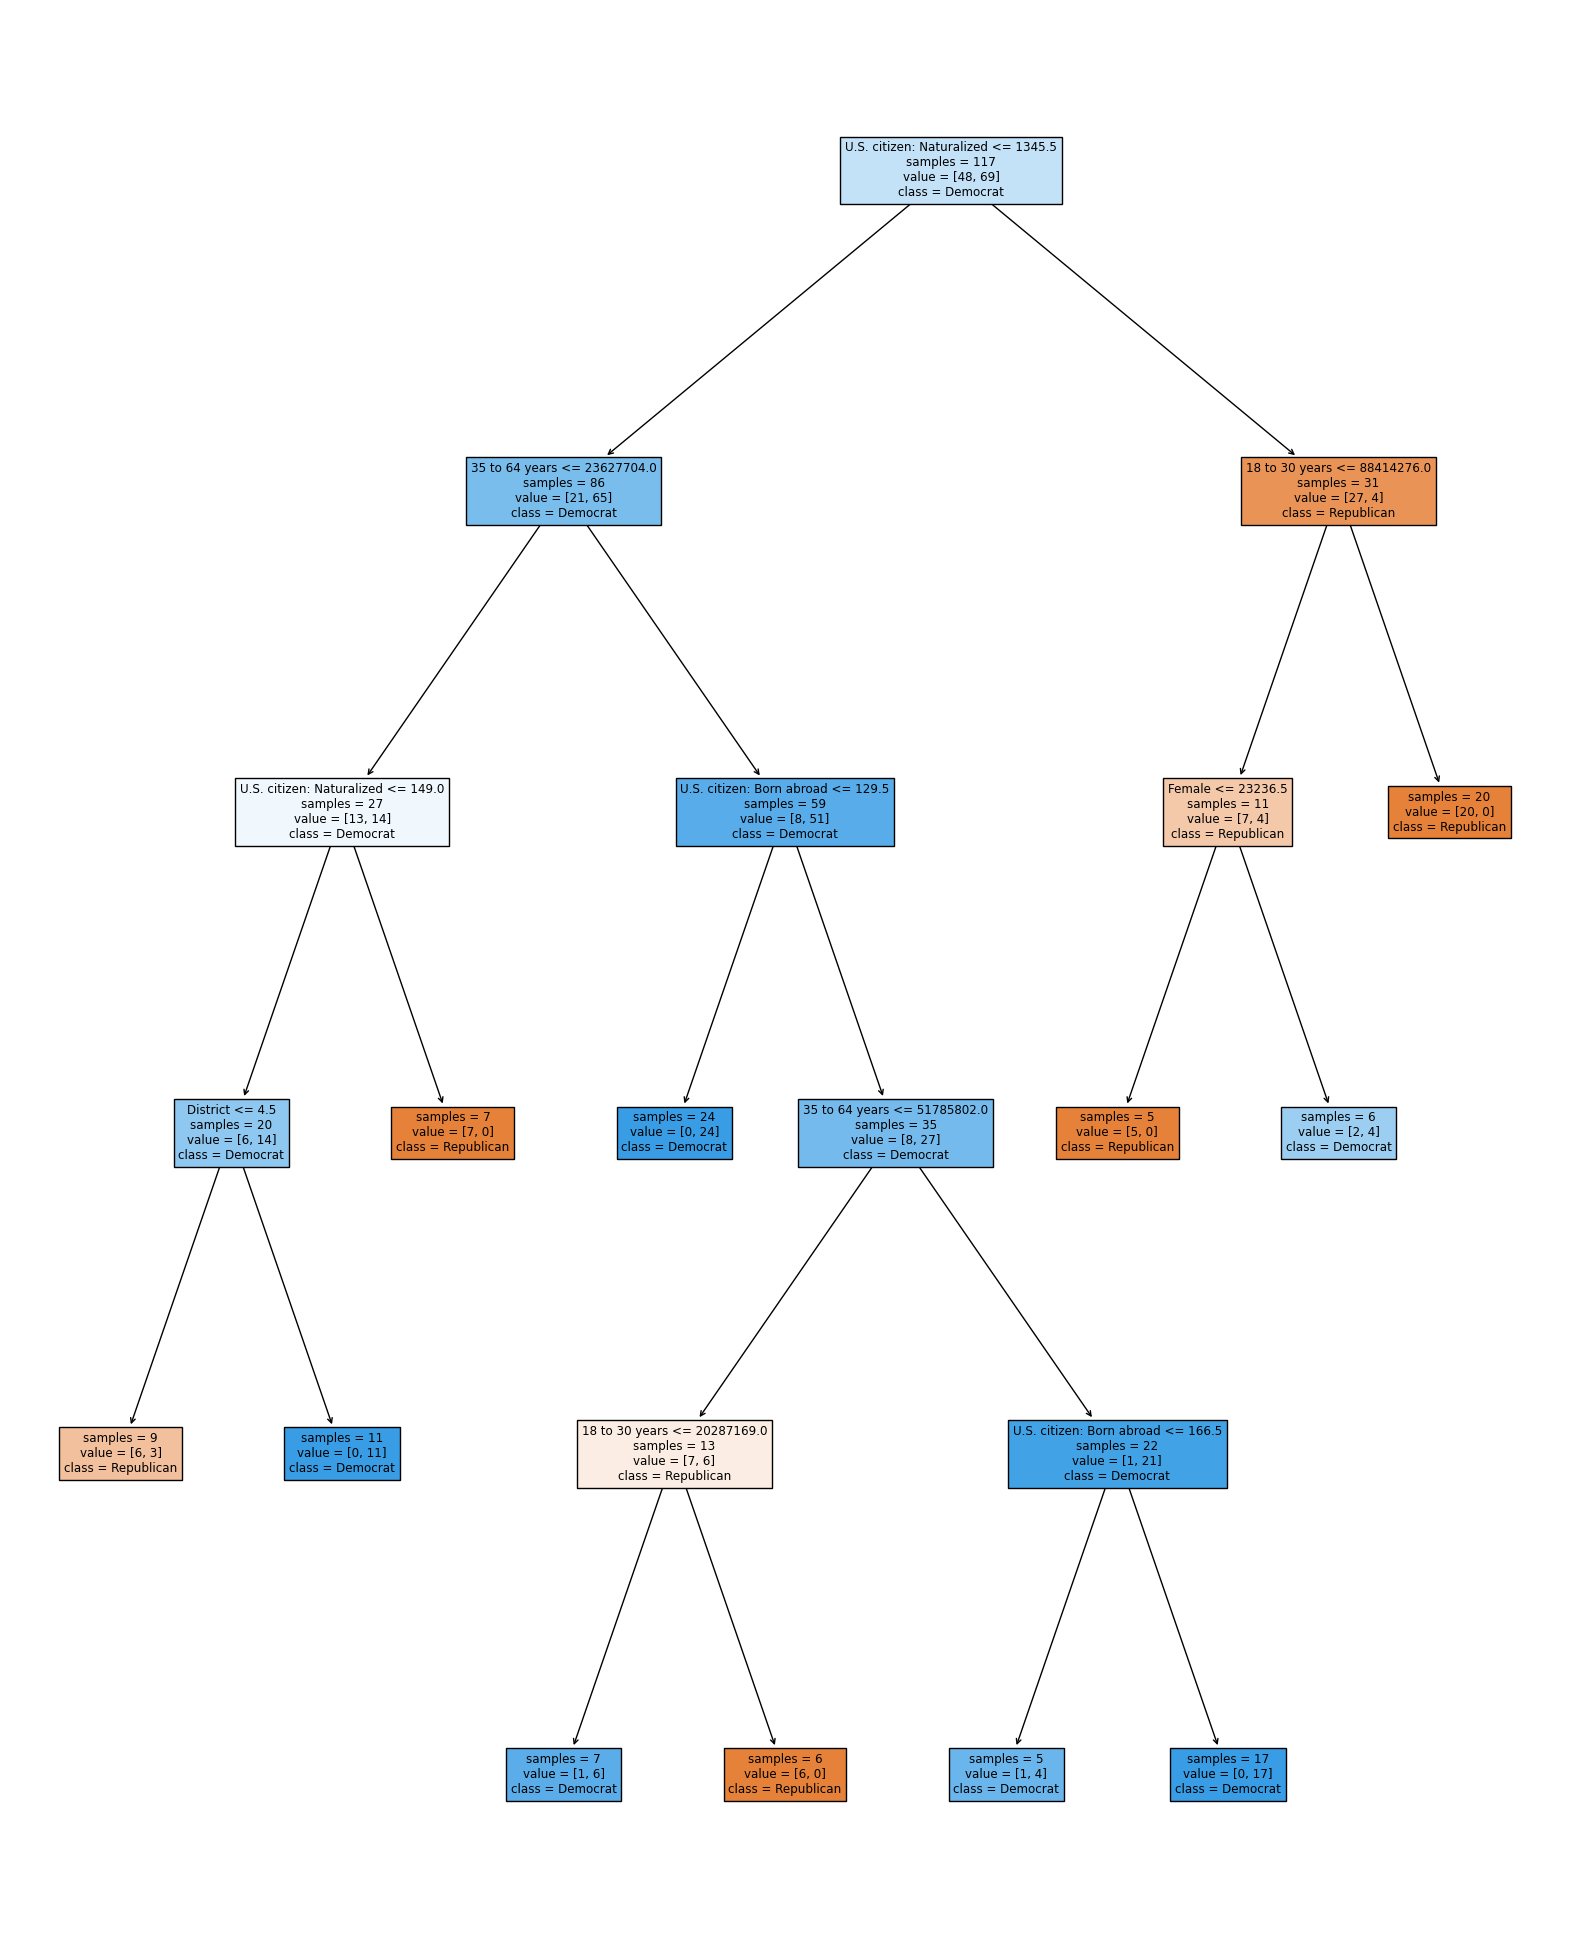

Accuracy: 0.7857142857142857


In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

county_data['COUNTY'] = county_data['COUNTY'].str.replace(' County', '')
# # merge county_data with votes
# combined = pd.merge(county_data,winners_2020, left_on='COUNTY', right_on='county_name', how='inner')
# combined.drop('county_name', axis=1, inplace=True)

# # merge combined with district_data
# combined = pd.merge(combined, districts, left_on='COUNTY', right_on='County', how='inner')

# # convert county names to uppercase and sort
# combined['COUNTY'] = combined['COUNTY'].str.upper()
# combined = combined.sort_values(by='COUNTY', ascending=True)
# Convert county names to lowercase and remove leading/trailing whitespaces
county_data['COUNTY'] = county_data['COUNTY'].str.strip().str.lower()
winners_2020['county_name'] = winners_2020['county_name'].str.strip().str.lower()
districts['County'] = districts['County'].str.strip().str.lower()

# Retry the merging process
combined = pd.merge(county_data, winners_2020, left_on='COUNTY', right_on='county_name', how='inner')
combined = pd.merge(combined, districts, left_on='COUNTY', right_on='County', how='inner')
# Reset index - chat
combined = combined.reset_index(drop=False)

print(combined)

# Save to CSV
combined.to_csv('combined.csv', index=False)


selected_features = ['District','U.S. citizen: Born in the US', 'U.S. citizen: Born abroad', 'U.S. citizen: Naturalized', 'Male', 'Female', '18 to 30 years', '35 to 64 years', '65 to 74 years', '75 years and over']
target_variable = 'party'

# Filter dataset to include only selected features and target variable
trainData = combined[selected_features + [target_variable]]
trainData.dropna(inplace=True)
X = trainData[selected_features]
y = trainData[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
clf = DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=42)
clf.fit(X_train, y_train)


plt.figure(figsize=(20, 25))
plot_tree(clf, filled=True, feature_names=selected_features, class_names= ['Republican', 'Democrat'], impurity=False)
plt.show()


y_pred = clf.predict(X_test)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



In [29]:
## This was just to check if the data frames were merging correctly
print("Unique values in county_data['COUNTY']:\n", county_data['COUNTY'].unique())
print("Unique values in winners_2020['county_name']:\n", winners_2020['county_name'].unique())
print("Unique values in districts['County']:\n", districts['County'].unique())

# Convert county names to lowercase and remove leading/trailing whitespaces
county_data['COUNTY'] = county_data['COUNTY'].str.strip().str.lower()
winners_2020['county_name'] = winners_2020['county_name'].str.strip().str.lower()
districts['County'] = districts['County'].str.strip().str.lower()

# Retry the merging process
combined = pd.merge(county_data, winners_2020, left_on='COUNTY', right_on='county_name', how='inner')
combined = pd.merge(combined, districts, left_on='COUNTY', right_on='County', how='inner')

# Print the merged DataFrame
print("Combined DataFrame:\n", combined.head())

Unique values in county_data['COUNTY']:
 ['Accomack' 'Albemarle' 'Alleghany' 'Amelia' 'Amherst' 'Appomattox'
 'Arlington' 'Augusta' 'Bath' 'Bedford' 'Bland' 'Botetourt' 'Brunswick'
 'Buchanan' 'Buckingham' 'Campbell' 'Caroline' 'Carroll' 'Charles City'
 'Charlotte' 'Chesterfield' 'Clarke' 'Craig' 'Culpeper' 'Cumberland'
 'Dickenson' 'Dinwiddie' 'Essex' 'Fairfax' 'Fauquier' 'Floyd' 'Fluvanna'
 'Franklin' 'Frederick' 'Giles' 'Gloucester' 'Goochland' 'Grayson'
 'Greene' 'Greensville' 'Halifax' 'Hanover' 'Henrico' 'Henry' 'Highland'
 'Isle of Wight' 'James City' 'King and Queen' 'King George'
 'King William' 'Lancaster' 'Lee' 'Loudoun' 'Louisa' 'Lunenburg' 'Madison'
 'Mathews' 'Mecklenburg' 'Middlesex' 'Montgomery' 'Nelson' 'New Kent'
 'Northampton' 'Northumberland' 'Nottoway' 'Orange' 'Page' 'Patrick'
 'Pittsylvania' 'Powhatan' 'Prince Edward' 'Prince George'
 'Prince William' 'Pulaski' 'Rappahannock' 'Richmond' 'Roanoke'
 'Rockbridge' 'Rockingham' 'Russell' 'Scott' 'Shenandoah' 'Smyth'
 

In [30]:
#verify that there is the correct data in the dataframe
print("Combined DataFrame:\n", combined.head())

Combined DataFrame:
       COUNTY U.S. citizen: Born in the US U.S. citizen: Born abroad  \
0   accomack                          541                       113   
1  albemarle                          936                       299   
2  alleghany                          121                        96   
3     amelia                          142                       122   
4    amherst                          190                        77   

  U.S. citizen: Naturalized Male Female 18 to 30 years 35 to 64 years  \
0                       295  244    222         117115         136144   
1                       626  193    166          16785          12690   
2                        45  137    112           6241           8473   
3                       105  131    135          14879          18494   
4                       132  154    169          83105          97115   

  65 to 74 years 75 years and over  ...  county_fips        office  \
0          54107              6535  ...    

Our predictive algorithm combines demographic data and voting district information from the 2020 Virginia elections. By incorporating both demographic characteristics and political geography, the model aims to provide a comprehensive understanding of election outcomes. The predictive algorithm is intended to be tested on demographic data from 2024, enabling it to possible predict the outcome of the 2024 Virginia elections. With the potential similarity to the 2020 election, where Biden and Trump were key contenders, the model can offer insights into the potential outcomes of this rematch.

Demographic data used in the model include citizenship status, gender, and age distribution within counties. These variables are known to influence voting behavior and are therefore crucial for understanding electoral outcomes. The decision nodes in our model analyze demographic thresholds within counties, such as the proportion of citizens in different age groups or gender categories. Based on these thresholds, the model then considers the voting district to further refine predictions.

After fine-tuning the dataset and refining the model parameters, our predictive algorithm achieved an accuracy of 78.57%. This accuracy level demonstrates the effectiveness of the model in capturing the complex interplay between demographics and electoral outcomes. Citizenship status, age distribution, and gender composition can significantly affect voting behavior in Virginia. For example, citizenship status may influence attitudes towards immigration policies, while age demographics can reflect generational differences in political preferences.